## Лабораторная работа 5

### Приближение функций

Вариант 29 (5.1.29, 5.6.7, 5.6.15, 5.8.6)
БПМ 171 Четвериков Илья Сергеевич

In [136]:
import numpy as np
import matplotlib.pyplot as plt
import sympy
%matplotlib inline

### Задача 5.1.29

Функция $y=f(x)$ задана таблицей значений $y_0, y_1,..., y_n$ в точках $x_0, x_1,..., x_n$. Используя метод наименьших квадратов (МНК), найти многочлен $P_m(x)=a_0+a_1x+...+a_mx^m$ наилучшего среднеквадратичного приближения оптимальной степени $m=m^*$. За оптимальное значение $m^*$ принять ту степень многочлена, начиная с которой величина $\sigma_m = \sqrt{\frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2}$ стабилизируется или начинает возрастать. 

1) Задать векторы исходных данных

In [137]:
x = np.array([0, 0.288, 0.575, 0.863, 1.15, 1.438, 1.725, 2.013, 2.3])
y = np.array([5.241, 4.892, 3.521, 1.121, -1.357, -3.5, -3.528, 0.257, 10.515])

2) Составить в явном виде нормальную систему метода наименьших квадратов и решить ее используя стандартные средства линейной алгебры, найти многочлены $P_m, m=0,1,2,...,$ по методу наименьших квадратов. Вычислить соответствующие им значения $\sigma_m$.

In [138]:
m_max = 8

def get_design_matrix(x, m):
    x_arr = np.array(x).reshape(-1, 1)
    A = x_arr ** 0
    
    for k in range(1, m+1):
        A = np.column_stack((A, x_arr ** k))
    return A

def get_sigma(coefs, x, y):
    x_arr = np.array(x)
    m = len(coefs) - 1;
    n = len(x)
    sigma2 = 1/(n-m)*((np.polynomial.polynomial.polyval(x_arr, coefs) - y) ** 2).sum()
    
    return np.sqrt(sigma2)

coefs_arr = []
for m in range(m_max):
    A = get_design_matrix(x, m)
    coefs = np.linalg.solve(A.T @ A, A.T @ y)
    coefs_arr.append(coefs)

sigma_arr = []
for m in range(m_max):
    sigma_arr.append(get_sigma(coefs_arr[m], x, y))
    
print(sigma_arr)

[4.339704379190526, 4.57273368219368, 2.9337726253433556, 0.6143778578997363, 0.07077096111365942, 0.055991904423090114, 0.06455750715270005, 0.0766701430205582]


3) Построить гистограмму зависимости $σ_m$ от $m$, на основании которой выбрать оптимальную степень $m^*$ многочлена наилучшего среднеквадратичного приближения.

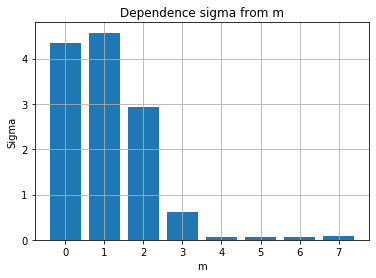

In [139]:
plt.title('Dependence sigma from m')
plt.ylabel('Sigma')
plt.xlabel('m')
plt.bar(range(len(coefs_arr)), sigma_arr)
plt.grid()
plt.show()

В качестве $m^*$ выберем $m=5$.    
4) На одном чертеже построить графики многочленов $P_m, m=0,1,2,...,m^*$ и точечный график исходной функции

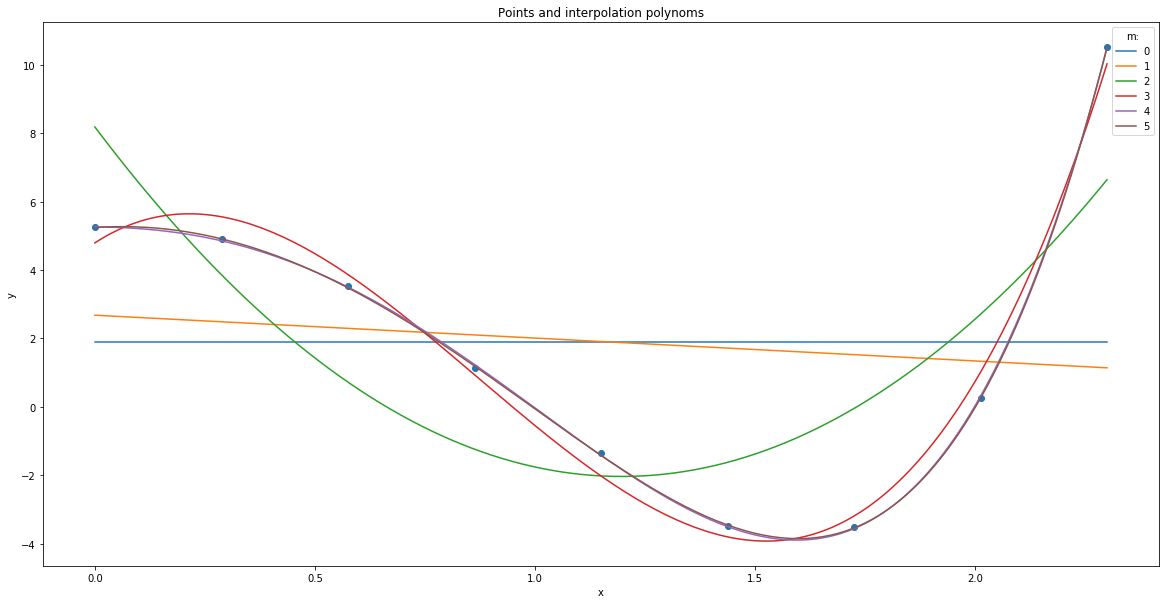

In [140]:
m_opt = 5

plt.figure(figsize=(20, 10))
plt.scatter(x,y)

for m in range(m_opt + 1):
    x_space = np.linspace(min(x), max(x), 200)
    poly = np.polynomial.polynomial.polyval(x_space, coefs_arr[m])
    plt.plot(x_space, poly, label=(len(coefs_arr[m])-1))

plt.title('Points and interpolation polynoms')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(title="m:");

5) (*) Решить задачу МНК используя QR или SVD разложение, не формируя матрицу левой части нормальной системы в явном виде. Использовать стандартные библиотечные средства линейной алгебры для матричных разложений. Сравнить результаты полученные с помошью решения нормальной системы МНК и матричных разложений.

In [141]:
m_opt = 5

def solve_lls_via_qr(A, b):
    m = A.shape[1]
    Q, R = np.linalg.qr(A)
    f = (Q.T @ b)[:m]
    
    return np.linalg.solve(R[:m], f)

coef_qr_5 = solve_lls_via_qr(get_design_matrix(x, m_opt), y)
print("Result with QR decomposition, coefficients of the polynom of degree 5:")
print(coef_qr_5)
print("Result with solving normal system directly, coefficients of the polynom of degree 5:")
print(coefs_arr[m_opt])

Result with QR decomposition, coefficients of the polynom of degree 5:
[ 5.23856858  0.87490641 -7.05759072 -0.0995631   0.58622327  0.39470676]
Result with solving normal system directly, coefficients of the polynom of degree 5:
[ 5.23856858  0.87490641 -7.05759072 -0.0995631   0.58622327  0.39470676]


Коэффициенты, полученные двумя способами совпадают. 

### Задачи 5.6.7 и 5.6.15

Дана функция $y=f(x)$. Приблизить $f(x)$ на отрезке $[a,b]$ интерполяционными многочленами Лагранжа 1, 2, 3 степеней. На одном чертеже построить графики приближающих многочленов и функции $f(x)$. Для многочлена 3 степени сравнить качество приближения при различном выборе узлов интерполяции.

Интерполяционный многочлен в форме Лагранжа $L_n(x)=\sum_{l=0}^{n}y_i\prod_{j=1,j \ne i}^{n}\frac{x-x_j}{x_i-x_j}$
Построим итерполяционные многочлены для двух заданных функций различных степеней

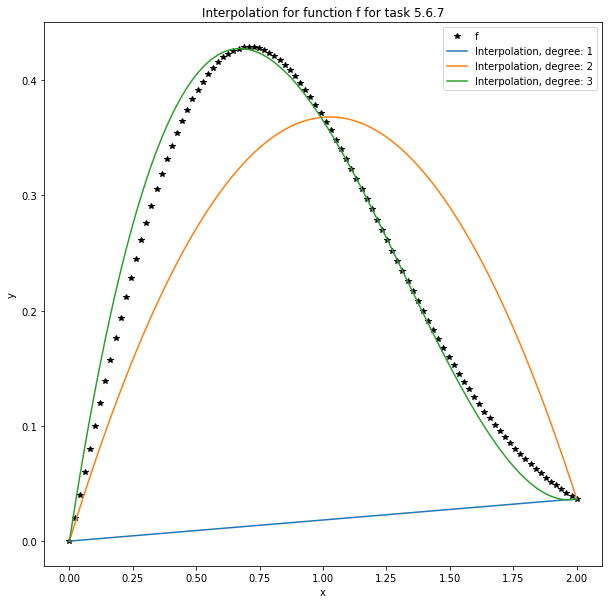

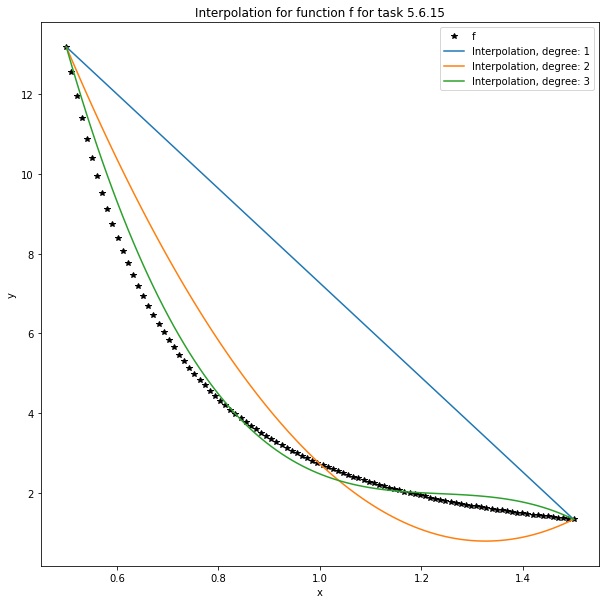

In [142]:
# first task
f1 = lambda x: x * np.exp(-x*x)
a1 = 0
b1 = 2
# second task
f2 = lambda x: x ** (-3) * np.exp(x)
a2 = 0.5
b2 = 1.5

def interpolate_lagrange(x, x_nodes, y_nodes):
    result = np.zeros(len(x))
    
    for i in range(len(x_nodes)):
        l_i = 1
        for j in range(len(x_nodes)):
            if i==j:
                continue
                
            l_i *= x - x_nodes[j]
            l_i /= x_nodes[i] - x_nodes[j]
        
        result += y_nodes[i] * l_i
        
    return result

def do_interpolation(f, a, b, title):
    x = np.linspace(a, b, 100)
    plt.figure(figsize=(10,10)) 
    plt.plot(x, f(x), "k*", label='f')

    for m in [1, 2, 3]:
        nodes = np.linspace(a, b, m+1)
        plt.plot(x, interpolate_lagrange(x, nodes, f(nodes)), label="Interpolation, degree: " + str(m))
    plt.title(title)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend();

do_interpolation(f1, a1, b1, "Interpolation for function f for task 5.6.7")
do_interpolation(f2, a2, b2, "Interpolation for function f for task 5.6.15")

Для многочленов третьей степени попробеум разные узлы интерполяции. Возьмем узлы Чебышева и равномерно распределенные. В качестве ошибки используем максимум по всему отрезку модуля разности функции и интерполянта

Error metrics for task 5.6.7
Metric for usual nodes: 0.04060794707994808
Metric for chebyshev nodes: 0.03088489919821201


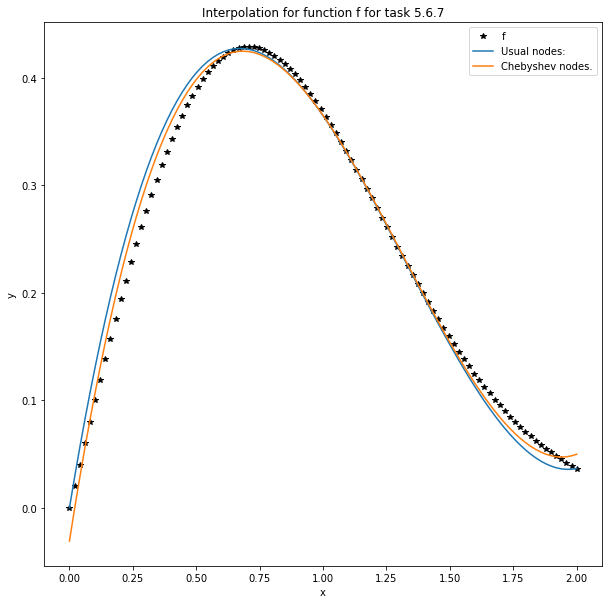

In [143]:
def do_comparision(f, a, b, task_number):
    m = 3
    x = np.linspace(a, b, 100)
    plt.figure(figsize=(10,10)) 
    plt.plot(x, f(x), "k*", label='f')
    
    nodes = np.linspace(a, b, m+1)
    plt.plot(x, interpolate_lagrange(x, nodes, f(nodes)), label="Usual nodes:")
    
    chebyshev_nodes = np.cos((2*np.arange(m + 1)+1)/2/(m+1)*np.pi)
    chebyshev_nodes = (chebyshev_nodes + 1) *(b-a)/2 + a
    plt.plot(x, interpolate_lagrange(x, chebyshev_nodes, f(chebyshev_nodes)), label="Chebyshev nodes.")
    
    max_usual = np.abs(f(x) - interpolate_lagrange(x, nodes, f(nodes))).max();
    max_chebyshev = np.abs(f(x) - interpolate_lagrange(x, chebyshev_nodes, f(chebyshev_nodes))).max()
    
    print("Error metrics for task " + task_number)
    print("Metric for usual nodes: {}".format(max_usual))
    print("Metric for chebyshev nodes: {}".format(max_chebyshev))
    
    plt.title("Interpolation for function f for task " + task_number)
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend();
    
do_comparision(f1, a1, b1, "5.6.7")

Error metrics for task 5.6.15
Metric for usual nodes: 0.8709100323439749
Metric for chebyshev nodes: 0.7030771393545638


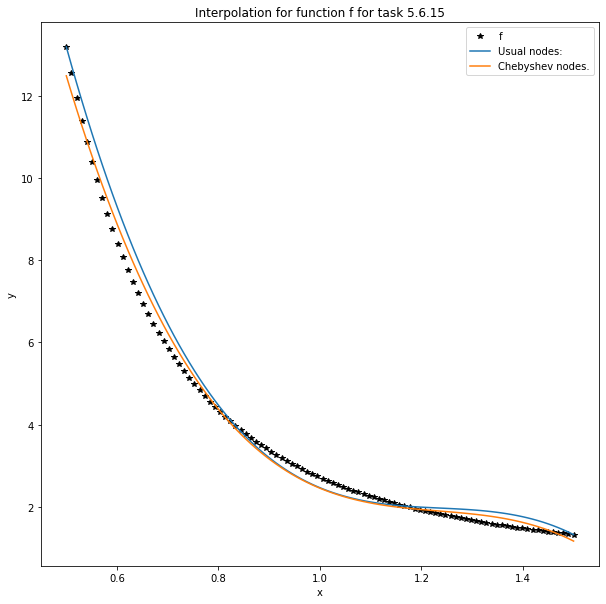

In [144]:
do_comparision(f2, a2, b2, "5.6.15")

Можем сделать вывод, что при использовании узлов Чебышева качество интерполирования повышается.

### Задача 5.8.6

Дана функция $y=f(x)$. Приблизить $f(x)$ методом глобальной интерполяции при равномерном и чебышевском распределениях узлов интерполяции. Сравнить качество приближения.

1) Составить программу-функцию построения интерполяционного многочлена при произвольном распределении узлов (для разнообразия используем многочлен в форме Ньютона).

In [145]:
f = lambda x: np.exp(-x*x)
a = -1
b = 1

def diff(f, x_arr):
    if len(x_arr)==1:
        return f(x_arr[0])
    
    f_h = diff(f, x_arr[1:])
    f_l = diff(f, x_arr[:-1])
    x_h = x_arr[-1]
    x_l = x_arr[0]
    
    return (f_h - f_l) / (x_h - x_l)

def interpolate_newton(f, x, x_nodes):
    sum_ = np.zeros(len(x));
    for i in range(len(x_nodes)):
        prod_ = diff(f, x_nodes[:i + 1]);
        for j in range(i):
            prod_ *= (x - x_nodes[j])
        sum_ += prod_

    return sum_


2) Используя составленную программу, вычислить приближенные значения функции $f(x)$ в $3k$ точках исходного отрезка $[a, b]$ по $k$ узлам интерполяции, распределенным равномерно на отрезке. На одном чертеже построить графики интерполяционного многочлена и исходной функции.  
3) Используя составленную программу, вычислить приближенные значения функции $f(x)$ в тех же $3k$ точках исходного отрезка по $k$ узлам интерполяции, имеющим чебышевское распределение. На одном чертеже построить графики интерполяционного многочлена и исходной функции.  
4) Сравнить качество приближения функции $f(x)$ при разном распределении узлов

Error metrics for 4 nodes
Metric for usual nodes: 0.05363333257841685
Metric for chebyshev nodes: 0.0424290142673277


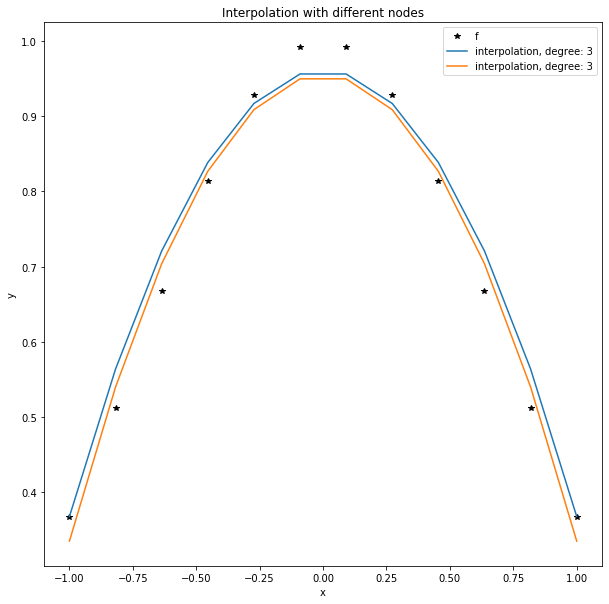

In [146]:
k = 4

def do_routine(f, a, b, k):
    x = np.linspace(a, b, 3 * k)
    plt.figure(figsize=(10,10)) 
    plt.plot(x, f(x), "k*", label='f')

    nodes = np.linspace(a, b, k)
    plt.plot(x, interpolate_newton(f, x, nodes), label="interpolation, degree: " + str(k - 1))

    chebyshev_nodes = np.cos((2*np.arange(k)+1)/2/(k)*np.pi)
    chebyshev_nodes = (chebyshev_nodes + 1) *(b-a)/2 + a
    plt.plot(x, interpolate_newton(f, x, chebyshev_nodes), label="interpolation, degree: " + str(k - 1))

    max_usual = np.abs(f(x) - interpolate_newton(f, x, nodes)).max()
    max_chebyshev = np.abs(f(x) - interpolate_newton(f, x, chebyshev_nodes)).max()

    print("Error metrics for " + str(k) + " nodes")
    print("Metric for usual nodes: {}".format(max_usual))
    print("Metric for chebyshev nodes: {}".format(max_chebyshev))

    plt.title("Interpolation with different nodes")
    plt.ylabel('y')
    plt.xlabel('x')
    plt.legend();
    
do_routine(f, a, b, k)

5) Выполнить п. 2-4, строя интерполяционный многочлен по $2k$ узлам интерполяции.  
6) Сравнить результаты при разном числе узлов.


Error metrics for 8 nodes
Metric for usual nodes: 0.0007201404178523441
Metric for chebyshev nodes: 0.00021310852904965483


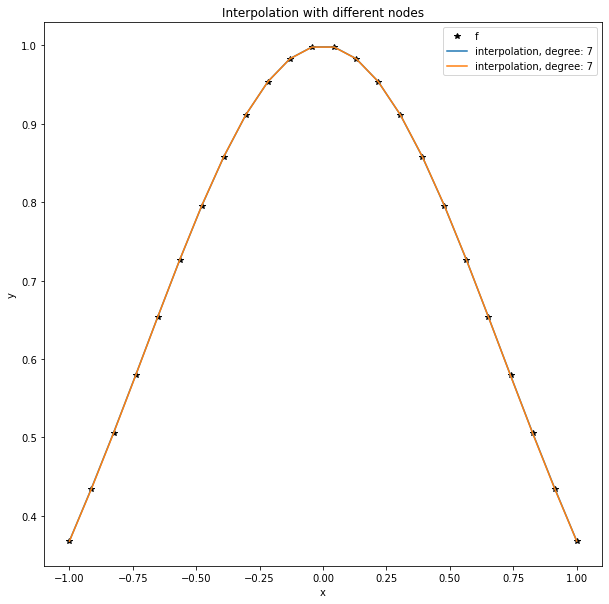

In [147]:
do_routine(f, a, b, 2*k)

Видно, что результат при применение узлов Чебышева получается в обоих случаях лучше. При увеличении количества узлов также результат лучше.